<a href="https://colab.research.google.com/github/radhika1603/INCLASSACTIVITIES/blob/main/GAZEANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install opencv-python dlib numpy

In [13]:
import cv2
import dlib
import numpy as np

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
# Download the pre-trained model if you haven't already:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Path to the downloaded model

# Function to estimate gaze direction
def get_gaze_direction(landmarks):
    left_eye_x = (landmarks.part(36).x + landmarks.part(39).x) // 2
    right_eye_x = (landmarks.part(42).x + landmarks.part(45).x) // 2
    face_center_x = (landmarks.part(30).x)  # Nose tip (approx center)

    if left_eye_x > face_center_x and right_eye_x > face_center_x:
        return "Looking Right"
    elif left_eye_x < face_center_x and right_eye_x < face_center_x:
        return "Looking Left"
    else:
        return "Looking Straight"

# Load uploaded video
video_path = "//content/Colgate Strong Teeth _ Daant Strong Toh Main Strong _ English.mp4"  # Update with correct path
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count > 300:  # Process first 300 frames for speed
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        gaze = get_gaze_direction(landmarks)

        # Draw bounding box and gaze text
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, gaze, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    frame_count += 1

cap.release()
cv2.destroyAllWindows()

--2025-02-10 07:32:59--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-02-10 07:32:59--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.0MB/s    in 3.8s    

2025-02-10 07:33:04 (16.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



Gaze Data Sample:
   Frame    Gaze
0      3  Center
1     21  Center
2     22  Center
3     23  Center
4     73  Center
5     74  Center
6    100  Center
7    101  Center
8    102  Center
9    103  Center


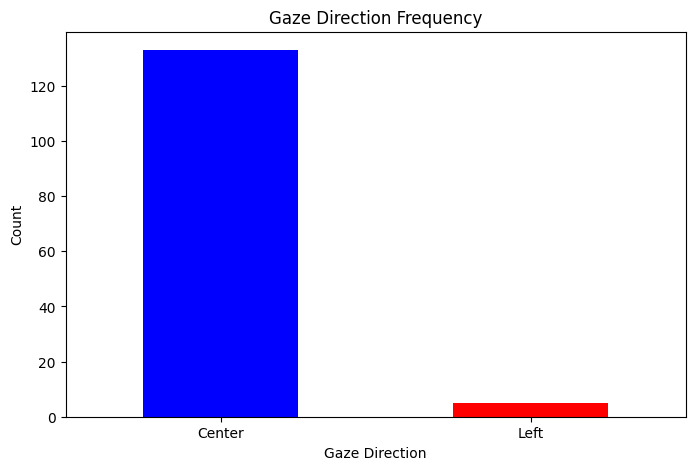

<ipython-input-15-7a4665352cc2>:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gaze"].replace({"Left": -1, "Center": 0, "Right": 1}, inplace=True)
<ipython-input-15-7a4665352cc2>:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gaze"].replace({"Left": -1, "Center": 0, "Right": 1}, inplac

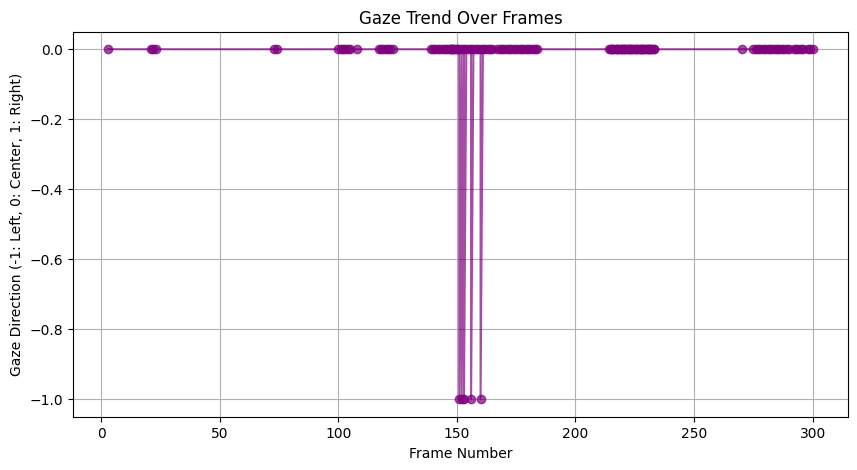

In [15]:
import cv2
import dlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dlib's face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

# Function to estimate gaze direction
def get_gaze_direction(landmarks):
    left_eye_x = (landmarks.part(36).x + landmarks.part(39).x) // 2
    right_eye_x = (landmarks.part(42).x + landmarks.part(45).x) // 2
    face_center_x = (landmarks.part(30).x)  # Nose tip (approx center)

    if left_eye_x > face_center_x and right_eye_x > face_center_x:
        return "Right"
    elif left_eye_x < face_center_x and right_eye_x < face_center_x:
        return "Left"
    else:
        return "Center"

# Load uploaded video
video_path = "/content/Colgate Strong Teeth _ Daant Strong Toh Main Strong _ English.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
gaze_data = []  # Store gaze data

while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count > 300:  # Process first 300 frames for speed
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        gaze = get_gaze_direction(landmarks)

        # Store data
        gaze_data.append({"Frame": frame_count, "Gaze": gaze})

        # Draw bounding box and gaze text
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, gaze, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    frame_count += 1

cap.release()
cv2.destroyAllWindows()

# Convert gaze data to a DataFrame
df = pd.DataFrame(gaze_data)

# Display gaze analysis table
print("Gaze Data Sample:")
print(df.head(10))  # Show first 10 rows

# Plot bar chart for gaze direction frequency
plt.figure(figsize=(8, 5))
df["Gaze"].value_counts().plot(kind="bar", color=["blue", "red", "green"])
plt.title("Gaze Direction Frequency")
plt.xlabel("Gaze Direction")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Plot line graph for gaze direction over frames
plt.figure(figsize=(10, 5))
df["Gaze"].replace({"Left": -1, "Center": 0, "Right": 1}, inplace=True)
plt.plot(df["Frame"], df["Gaze"], marker="o", linestyle="-", color="purple", alpha=0.7)
plt.title("Gaze Trend Over Frames")
plt.xlabel("Frame Number")
plt.ylabel("Gaze Direction (-1: Left, 0: Center, 1: Right)")
plt.grid(True)
plt.show()

In [14]:
import cv2
import dlib
import numpy as np

# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")  # Update path if needed

# Function to estimate gaze direction
def get_gaze_direction(landmarks):
    left_eye_x = (landmarks.part(36).x + landmarks.part(39).x) // 2
    right_eye_x = (landmarks.part(42).x + landmarks.part(45).x) // 2
    face_center_x = (landmarks.part(30).x)  # Nose tip (approx center)

    if left_eye_x > face_center_x and right_eye_x > face_center_x:
        return "Looking Right"
    elif left_eye_x < face_center_x and right_eye_x < face_center_x:
        return "Looking Left"
    else:
        return "Looking Straight"

# Load uploaded video
video_path = "/content/Colgate Strong Teeth _ Daant Strong Toh Main Strong _ English.mp4"  # Update with correct path
cap = cv2.VideoCapture(video_path)

frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count > 300:  # Process first 300 frames for speed
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)
        gaze = get_gaze_direction(landmarks)

        # Draw bounding box and gaze text
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, gaze, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    frame_count += 1

cap.release()
cv2.destroyAllWindows()